<a href="https://colab.research.google.com/github/wcj365/jay_data690/blob/main/10_LLN_CLT_Dice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10 - The Foundation of Inferential Statistics 
## The Law of Large Numbers(LLN) and The Central Limit Theorem (CLT)
## Using Dice Rolling for Simulation

Statistics as defined by the American Statistical Association (ASA) “is the science of learning from data, and of measuring, controlling and communicating uncertainty". Inferencial Statistics is one of the two main branches of statistics (the other is Descriptive Statistics). It uses a random sample of data taken from a population to describe and make inferences about the population which is typically unknown. Inferential statistics or statistical inference builds upon two theorems:

- **The Law of Large Numbers** (The mean of a large sample from a large number of trials is close to the mean of the distribution)
- **The Central Limit Theorems** (The sampling distribution of a sample mean is approximately a normal distribution even the underlying population distribution is not normal)



In [1]:
# Import useful Python libraries upfront

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#from pylab import rcParams

## Let's Explore LLN first

LLN states that as the sample size increases, its mean gets closer to the average of the whole population. 

We are going to simulate a dice rolling. 
A dice has six different possible outcome - 1, 2,3,4,5,6. These outcomes represent a discrete distribution. 

The probability distribution of a discrete random variable X is a list of each possible value of X together with the probability that X takes that value in one trial of the experiment. 

- Each probability P(x) must be between 0 and 1: 0≤P(x)≤1. 
- The sum of all the probabilities is 1: ΣP(x)=1.

This is call probability mass function (pmf). Note: for a continuous random variable, the distribution is probability density funciton (pdf)

We start the sample size from 5 and increase by 10 each time until it reaches 1000. We calculate the sample means and make a line plot against the sample sizes. We can see as the sample size increases, the sample mean converges to the population mean which is 3.5 shown by a horizontal line.

In [2]:
# Frst, we generate sample means

DICE = [1,2,3,4,5,6]
PROB = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

sample_means = []
sample_sizes = range(5, 500, 10)

#for size in sample_sizes:
#    sample = np.random.choice(a=DICE,  p=PROB, size=size)
#    sample_means.append(sample.mean())              # append the sameple mean to the list

# Instead of using for loop, we use the parsimonious list comprehension 
sample_means = [round(np.random.choice(a=DICE, p=PROB, size=s).mean(),2) for s in sample_sizes] 

print(sample_means[:10])                   # display the first 10 sample means
print(sample_means[-10:])                  # display the last 10 sample means

[2.8, 2.87, 3.08, 3.6, 3.33, 3.36, 3.25, 3.84, 3.16, 3.78]
[3.45, 3.47, 3.56, 3.63, 3.56, 3.53, 3.53, 3.5, 3.42, 3.53]


In [3]:
# population mean

pop_mean = np.mean(DICE)  

print(pop_mean)

3.5


In [4]:
#DICE = [1,2,3,4,5,6]
#PROB = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
#pop_mean = sum(DICE) / len(DICE)
#print("pop mean = ", pop_mean)
#x = np.random.choice(a=DICE, p=PROB, size=200)
#print("sample mean = ", x.mean())

Text(0.5, 0, 'Sample Size')

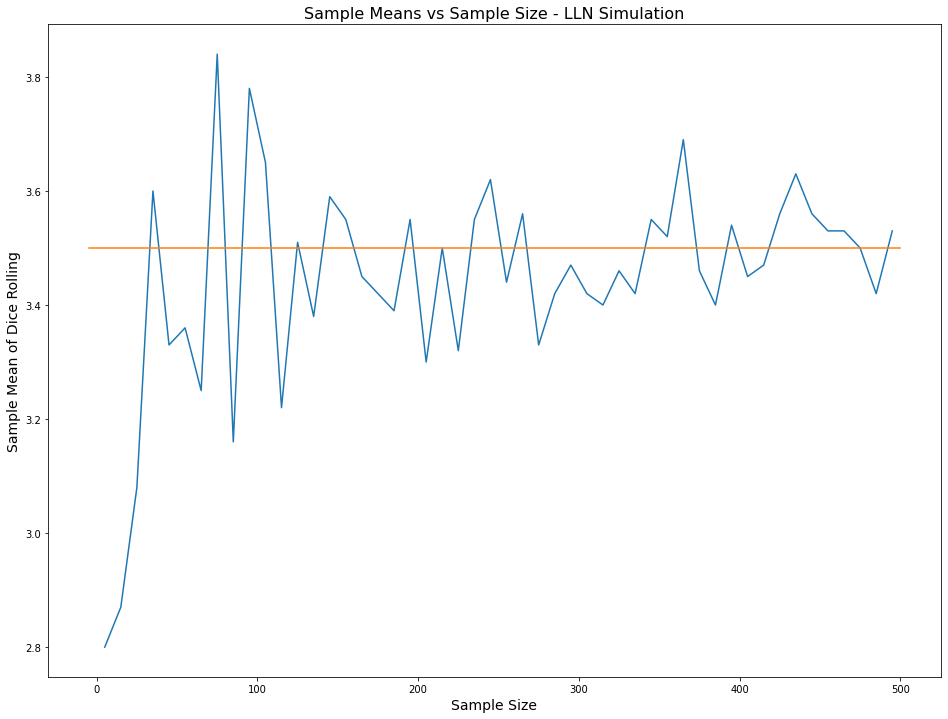

In [5]:
# Next, we make a line plot to show the relationship between sample mean and sample size


fig, ax = plt.subplots(figsize=(16,12))

# make a line plot of sample means (y-axis) along sample sizes (x-axis)
ax.plot(sample_sizes, sample_means) 

# draw a horizontal line of the population mean                                             
ax.plot((-5,sample_sizes[-1] + 5), (pop_mean, pop_mean)) 

ax.set_title("Sample Means vs Sample Size - LLN Simulation", size=16)
ax.set_ylabel("Sample Mean of Dice Rolling", size=14)
ax.set_xlabel("Sample Size", size=14)

# Homework Question #1

Implement the above chart using Plotly Express. Hint:
- Use the line chart. 
- Add a horizonal line. 

In [18]:
import plotly.express as px

zipdata = pd.DataFrame(list(zip(sample_sizes, sample_means)),
               columns =['sample_sizes', 'sample_means'])

fig = px.line(zipdata,
              x="sample_sizes",
              y="sample_means",
              labels= {'sample_sizes' : 'Sample Size','sample_means' : 'Sample Mean of Dice Rolling'},
              title = "LLN Simulation - Sample Means vs Sample Size ",
              template= 'plotly_white',
              height=600,
              width=1000
              )

fig.add_hline(y=pop_mean)
fig.show()

## Let's explore the Central Limit Theorm (CLT)

CLT states that the sampling distribution of the sample mean of any independent, random variable will be normal or nearly normal, if the sample size is large enough. How large is "large enough"? The answer depends on two factors:

- **Requirements for accuracy**- The more closely the sampling distribution needs to resemble a normal distribution, the more sample points will be required.
- **The shape of the underlying population** - The more closely the original population resembles a normal distribution, the fewer sample points will be required. 

In practice, some statisticians say that a sample size of 30 is large enough when the population distribution is roughly bell-shaped. Others recommend a sample size of at least 40. But if the original population is distinctly not normal (e.g., is badly skewed, has multiple peaks, and/or has outliers), researchers like the sample size to be even larger.

As can be seen from the resulting plot, as sample size increases, the sampling distribution becomes closer to be normal and its mean converges to the population mean and its variance becomes smaller. This implies as the sample size increases we have more confidence that the sample mean approximates the population mean.

Text(0, 0.5, 'Density')

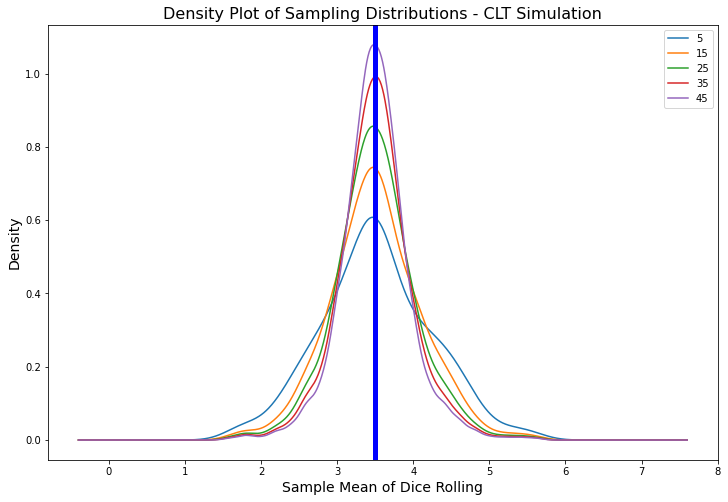

In [6]:
fig, ax = plt.subplots(figsize=(12,8))

for s in range(5, 50, 10):     # sample sizes
    for i in range(500):        # repeat the experiment enough times to get a distribution
      sample = np.random.choice(a=DICE,  p=PROB, size=s)
      sample_means.append(sample.mean())              # append the sameple mean to the list

# The matplotlib histrogram does not look good. Use Pandas density plot instead.
#   ax.hist(sample_means, density=True, legend=True) 
    pd.DataFrame(sample_means).plot.density(ax=ax)

ax.legend(sample_sizes) 

# draw a vertical line of the population mean 
ax.axvline(x=pop_mean, linewidth=5, color="b")  

ax.set_title("Density Plot of Sampling Distributions - CLT Simulation", size=16)
ax.set_xlabel("Sample Mean of Dice Rolling",size=14)
ax.set_ylabel("Density",size=14)

# Homework Question 2 (optional)

Implement the above plot using Plotly.

In [7]:
sample_means = []
for i in range(500):        # repeat the experiment enough times to get a distribution
    sample = np.random.choice(a=DICE,  p=PROB, size=50)
    sample_means.append(sample.mean())  

sample_means[:10]

[3.88, 3.38, 3.5, 3.36, 3.8, 3.42, 3.78, 3.42, 3.54, 3.32]

(array([  7.,  21.,  57., 106., 119., 102.,  62.,  16.,   9.,   1.]),
 array([2.82 , 2.972, 3.124, 3.276, 3.428, 3.58 , 3.732, 3.884, 4.036,
        4.188, 4.34 ]),
 <a list of 10 Patch objects>)

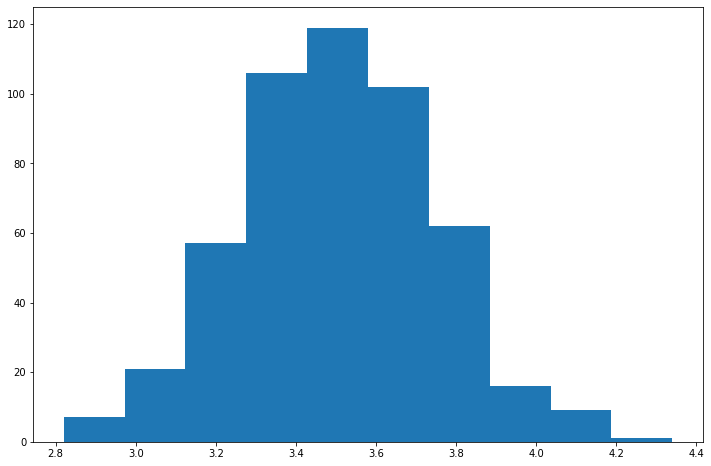

In [8]:
fig,ax = plt.subplots(figsize=(12,8))
ax.hist(sample_means)

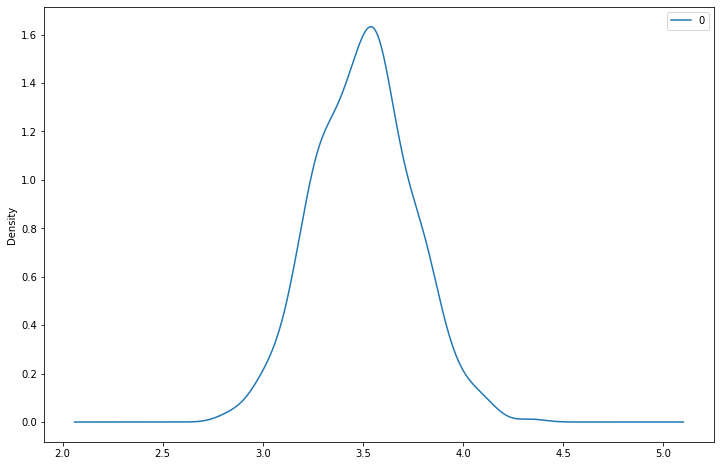

In [9]:
fig,ax = plt.subplots(figsize=(12,8))
df = pd.DataFrame(sample_means)
df.plot.density(ax=ax)